**PoS-TAGGING NOTEBOOK**


In [1]:
import csv
import numpy as np

import tensorflow as tf
import tensorflow.keras as keras
from keras.preprocessing.text import Tokenizer
from keras.utils import plot_model

from sklearn.preprocessing import LabelEncoder

from keras.utils import plot_model

from keras.layers import Dense, LSTM, InputLayer, Bidirectional, TimeDistributed, Embedding, Activation, Concatenate
from keras.optimizers import Adam

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
# Import classes from file.py
from drive.MyDrive.P1.data import ProcessData
from drive.MyDrive.P1.model_word import wordTagger
from drive.MyDrive.P1.model_char import charTagger


#**DATASETS**

The first step would be to load the data that we are going to use, in this case, we have chosen the English, Spanish and Galician datasets. 
In this notebook we will present the executions of the English models, however, if one wanted to execute the models of any of the other two languages, these would be analogous, with the only difference being the data used both in the training and in their evaluation or their prediction.

## ENGLISH LANGUAGE

In [4]:
# Training
en_training_path = keras.utils.get_file(
    "en_ewt-ud-train.conllu",
    "https://github.com/UniversalDependencies/UD_English-EWT/raw/master/en_ewt-ud-train.conllu")
en_training_txt = open(en_training_path,encoding="utf8")
en_training_data=en_training_txt.read()

en_training_lines = en_training_data.split("\n")

# Validation
en_validation_path = keras.utils.get_file(
    "en_ewt-ud-dev.conllu",
    "https://github.com/UniversalDependencies/UD_English-EWT/raw/master/en_ewt-ud-dev.conllu")
en_validation_txt = open(en_validation_path,encoding="utf8")
en_validation_data = en_validation_txt.read()

en_validation_lines = en_validation_data.split("\n")


# Test
en_test_path = keras.utils.get_file(
    "en_ewt-ud-test.conllu",
    "https://github.com/UniversalDependencies/UD_English-EWT/raw/master/en_ewt-ud-test.conllu")
en_test_txt = open(en_test_path,encoding="utf8")
en_test_data = en_test_txt.read()

en_test_lines = en_test_data.split("\n")

1751622/1751622 [==============================] - 0s 0us/step


##SPANISH LANGUAGE

In [5]:
# Training
sp_training_path = keras.utils.get_file(
    "es_gsd-ud-train.conllu",
    "https://raw.githubusercontent.com/UniversalDependencies/UD_Spanish-GSD/master/es_gsd-ud-train.conllu")
sp_training_txt = open(sp_training_path,encoding="utf8")
sp_training_data=sp_training_txt.read()

sp_training_lines = sp_training_data.split("\n")

# Validation
sp_validation_path = keras.utils.get_file(
    "es_gsd-ud-dev.conllu",
    "https://raw.githubusercontent.com/UniversalDependencies/UD_Spanish-GSD/master/es_gsd-ud-dev.conllu")
sp_validation_txt = open(sp_validation_path,encoding="utf8")
sp_validation_data = sp_validation_txt.read()

sp_validation_lines = sp_validation_data.split("\n")


# Test
sp_test_path = keras.utils.get_file(
    "es_gsd-ud-test.conllu",
    "https://github.com/UniversalDependencies/UD_Spanish-GSD/raw/master/es_gsd-ud-test.conllu")
sp_test_txt = open(sp_test_path,encoding="utf8")
sp_test_data = sp_test_txt.read()

sp_test_lines = sp_test_data.split("\n")

733073/733073 [==============================] - 0s 0us/step


##GALICIAN LANGUAGE

In [6]:
# Training
ga_training_path = keras.utils.get_file(
    "gl_ctg-ud-train.conllu",
    "https://github.com/UniversalDependencies/UD_Galician-CTG/blob/master/gl_ctg-ud-train.conllu?raw=true")
ga_training_txt = open(ga_training_path,encoding="utf8")
ga_training_data=ga_training_txt.read()

ga_training_lines = ga_training_data.split("\n")

# Validation
ga_validation_path = keras.utils.get_file(
    "gl_ctg-ud-dev.conllu",
    "https://github.com/UniversalDependencies/UD_Galician-CTG/blob/master/gl_ctg-ud-dev.conllu?raw=true")
ga_validation_txt = open(ga_validation_path,encoding="utf8")
ga_validation_data = ga_validation_txt.read()

ga_validation_lines = ga_validation_data.split("\n")


# Test
ga_test_path = keras.utils.get_file(
    "gl_ctg-ud-test.conllu",
    "https://github.com/UniversalDependencies/UD_Galician-CTG/blob/master/gl_ctg-ud-test.conllu?raw=true")
ga_test_txt = open(ga_test_path,encoding="utf8")
ga_test_data = ga_test_txt.read()

ga_test_lines = ga_test_data.split("\n")

1763043/1763043 [==============================] - 0s 0us/step


# **WORD-LEVEL MODELS**

## ENGLISH WORD-MODELS

### WORD-LEVEL ENGLISH DATA


We are going to preprocess the English language data. 
If we want to create and train the model for the other two languages, it would be analogous.

In [7]:
traindata=ProcessData(en_training_lines)
valdata=ProcessData(en_validation_lines)
testdata=ProcessData(en_test_lines)

tokenizer_word = Tokenizer(filters='',lower=False, oov_token='UNK') 
tokenizer_word.fit_on_texts(traindata.create_inputs())

def flatten(l):
  return [item for sublist in l for item in sublist] 

encoder = LabelEncoder()
encoder = encoder.fit(flatten(traindata.create_targets()))

#TRAIN DATA
train_inputs=traindata.inputs_to_ids(tokenizer_word,128)
train_targets=traindata.targets_to_ids(encoder,128)

#VALIDATION DATA
val_inputs=valdata.inputs_to_ids(tokenizer_word,128)
val_targets=valdata.targets_to_ids(encoder,128)

#TEST DATA
test_inputs=testdata.inputs_to_ids(tokenizer_word,128)
test_targets=testdata.targets_to_ids(encoder,128)

### WORD-LEVEL MODEL (emb_dim=100, lstm_neurons=256)

In [8]:
# Word-level model (emb_dim=100, lstm_neurons=256)
out_dim=len(np.unique(flatten(traindata.create_targets())))

word_model=wordTagger(tokenizer_word, emb_dim=100, lstm_neurons=256, output_dim=out_dim)
word_model.build().summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (InputLayer)    [(None, 128)]             0         
                                                                 
 Embedding_Layer (Embedding)  (None, 128, 100)         1967500   
                                                                 
 LSTM_Layer (LSTM)           (None, 128, 256)          365568    
                                                                 
 TimeDistributed_Dense_Layer  (None, 128, 17)          4369      
  (TimeDistributed)                                              
                                                                 
Total params: 2,337,437
Trainable params: 2,337,437
Non-trainable params: 0
_________________________________________________________________


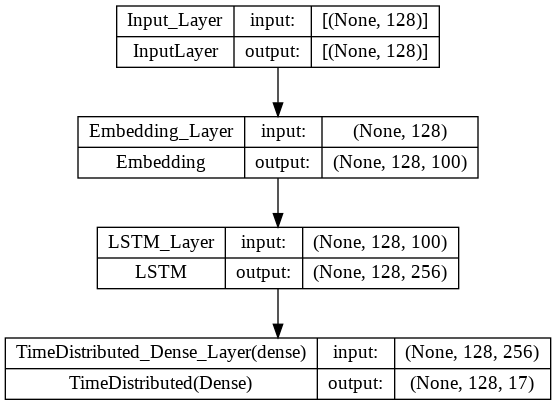

In [9]:
word_model.show()

In [10]:
# Train
word_model.train(train_inputs,train_targets, val_inputs, val_targets, loss='categorical_crossentropy', opt='adam', metrics=['accuracy'], epochs=10)

Epoch 1/10
197/197 [==============================] - 13s 22ms/step - loss: 0.2020 - accuracy: 0.5338 - val_loss: 0.0667 - val_accuracy: 0.7981
Epoch 2/10
197/197 [==============================] - 3s 15ms/step - loss: 0.0544 - accuracy: 0.8731 - val_loss: 0.0422 - val_accuracy: 0.8720
Epoch 3/10
197/197 [==============================] - 3s 15ms/step - loss: 0.0298 - accuracy: 0.9331 - val_loss: 0.0379 - val_accuracy: 0.8816
Epoch 4/10
197/197 [==============================] - 3s 14ms/step - loss: 0.0214 - accuracy: 0.9485 - val_loss: 0.0375 - val_accuracy: 0.8844
Epoch 5/10
197/197 [==============================] - 3s 15ms/step - loss: 0.0172 - accuracy: 0.9564 - val_loss: 0.0382 - val_accuracy: 0.8851
Epoch 6/10
197/197 [==============================] - 3s 14ms/step - loss: 0.0145 - accuracy: 0.9626 - val_loss: 0.0390 - val_accuracy: 0.8856
Epoch 7/10
197/197 [==============================] - 3s 14ms/step - loss: 0.0124 - accuracy: 0.9682 - val_loss: 0.0409 - val_accuracy: 0.885

In [11]:
# Evaluate
word_model.evaluate(test_inputs, test_targets,loss='categorical_crossentropy', opt='adam', metrics=['accuracy'],show=True)

65/65 [==============================] - 3s 5ms/step - loss: 0.0469 - accuracy: 0.8739
Test loss: 0.04691510275006294
Test accuracy: 0.8738742470741272


[0.04691510275006294, 0.8738742470741272]

In [12]:
# Predict
outputs=word_model.predict(test_inputs)
predictions=testdata.decode(outputs,encoder)

# We display some of the predictions and their corresponding targets
print(testdata.create_targets()[0])
print(predictions[0])

print(testdata.create_targets()[2])
print(predictions[2])

65/65 [==============================] - 1s 4ms/step
['PRON', 'SCONJ', 'PROPN', 'VERB', 'ADP', 'PROPN', 'PUNCT']
['PRON' 'SCONJ' 'PROPN' 'PROPN' 'ADP' 'PROPN' 'PUNCT']
['PUNCT', 'ADP', 'PROPN', 'PROPN', 'ADP', 'PROPN', 'PROPN', 'PROPN', 'PUNCT']
['PUNCT' 'ADP' 'PROPN' 'VERB' 'ADP' 'PROPN' 'PROPN' 'PROPN' 'PUNCT']


### WORD-LEVEL MODEL (emb_dim=30, lstm_neurons=100)

In [13]:
#Word-level model (emb_dim=30, lstm_neurons=256)
word_model2=wordTagger(tokenizer_word, emb_dim=30, lstm_neurons=100, output_dim=out_dim)
word_model2.build().summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (InputLayer)    [(None, 128)]             0         
                                                                 
 Embedding_Layer (Embedding)  (None, 128, 30)          590250    
                                                                 
 LSTM_Layer (LSTM)           (None, 128, 100)          52400     
                                                                 
 TimeDistributed_Dense_Layer  (None, 128, 17)          1717      
  (TimeDistributed)                                              
                                                                 
Total params: 644,367
Trainable params: 644,367
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Train
word_model2.train(train_inputs,train_targets, val_inputs, val_targets, loss='categorical_crossentropy', opt='adam', metrics=['accuracy'], epochs=10)

Epoch 1/10
197/197 [==============================] - 8s 22ms/step - loss: 0.2770 - accuracy: 0.3600 - val_loss: 0.1244 - val_accuracy: 0.6684
Epoch 2/10
197/197 [==============================] - 3s 14ms/step - loss: 0.1012 - accuracy: 0.7715 - val_loss: 0.0629 - val_accuracy: 0.8108
Epoch 3/10
197/197 [==============================] - 3s 14ms/step - loss: 0.0531 - accuracy: 0.8863 - val_loss: 0.0465 - val_accuracy: 0.8645
Epoch 4/10
197/197 [==============================] - 3s 14ms/step - loss: 0.0343 - accuracy: 0.9293 - val_loss: 0.0418 - val_accuracy: 0.8740
Epoch 5/10
197/197 [==============================] - 3s 14ms/step - loss: 0.0261 - accuracy: 0.9428 - val_loss: 0.0401 - val_accuracy: 0.8779
Epoch 6/10
197/197 [==============================] - 3s 14ms/step - loss: 0.0217 - accuracy: 0.9501 - val_loss: 0.0396 - val_accuracy: 0.8817
Epoch 7/10
197/197 [==============================] - 3s 14ms/step - loss: 0.0188 - accuracy: 0.9546 - val_loss: 0.0395 - val_accuracy: 0.8831

In [15]:
# Evaluate
word_model2.evaluate(test_inputs, test_targets,loss='categorical_crossentropy', opt='adam', metrics=['accuracy'],show=True)

65/65 [==============================] - 3s 5ms/step - loss: 0.0410 - accuracy: 0.8845
Test loss: 0.040971819311380386
Test accuracy: 0.8845142126083374


[0.040971819311380386, 0.8845142126083374]

In [16]:
#Predict
outputs2=word_model2.predict(test_inputs)
predictions2=testdata.decode(outputs2,encoder)

print(testdata.create_targets()[56])
print(predictions2[56])

65/65 [==============================] - 1s 4ms/step
['PROPN', 'VERB', 'DET', 'VERB', 'NOUN', 'PUNCT', 'ADP', 'PRON', 'PROPN', 'CCONJ', 'PROPN', 'VERB', 'ADP', 'ADP', 'NOUN', 'NUM', 'ADP', 'NUM', 'PUNCT']
['PROPN' 'VERB' 'DET' 'VERB' 'NOUN' 'PUNCT' 'ADP' 'PRON' 'NOUN' 'CCONJ'
 'NOUN' 'VERB' 'ADP' 'PART' 'NOUN' 'PRON' 'ADP' 'PROPN' 'PUNCT']


### WORD-LEVEL MODEL (emb_dim=30, lstm_neurons=12)

In [17]:
# Word-level model (emb_dim=30, lstm_neurons=12)
word_model3=wordTagger(tokenizer_word, emb_dim=30, lstm_neurons=12, output_dim=out_dim)
word_model3.build().summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (InputLayer)    [(None, 128)]             0         
                                                                 
 Embedding_Layer (Embedding)  (None, 128, 30)          590250    
                                                                 
 LSTM_Layer (LSTM)           (None, 128, 12)           2064      
                                                                 
 TimeDistributed_Dense_Layer  (None, 128, 17)          221       
  (TimeDistributed)                                              
                                                                 
Total params: 592,535
Trainable params: 592,535
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Train
word_model3.train(train_inputs,train_targets, val_inputs, val_targets, loss='categorical_crossentropy', opt='adam', metrics=['accuracy'], epochs=10)

Epoch 1/10
197/197 [==============================] - 8s 20ms/step - loss: 0.3208 - accuracy: 0.2071 - val_loss: 0.2118 - val_accuracy: 0.4183
Epoch 2/10
197/197 [==============================] - 2s 13ms/step - loss: 0.2159 - accuracy: 0.5693 - val_loss: 0.1330 - val_accuracy: 0.6779
Epoch 3/10
197/197 [==============================] - 2s 13ms/step - loss: 0.1333 - accuracy: 0.7409 - val_loss: 0.0893 - val_accuracy: 0.7828
Epoch 4/10
197/197 [==============================] - 3s 13ms/step - loss: 0.0892 - accuracy: 0.8445 - val_loss: 0.0677 - val_accuracy: 0.8393
Epoch 5/10
197/197 [==============================] - 3s 13ms/step - loss: 0.0644 - accuracy: 0.8975 - val_loss: 0.0565 - val_accuracy: 0.8601
Epoch 6/10
197/197 [==============================] - 3s 13ms/step - loss: 0.0498 - accuracy: 0.9216 - val_loss: 0.0503 - val_accuracy: 0.8682
Epoch 7/10
197/197 [==============================] - 3s 13ms/step - loss: 0.0408 - accuracy: 0.9298 - val_loss: 0.0469 - val_accuracy: 0.8710

In [19]:
# Evaluate
word_model3.evaluate(test_inputs, test_targets,loss='categorical_crossentropy', opt='adam', metrics=['accuracy'],show=True)

65/65 [==============================] - 3s 5ms/step - loss: 0.0400 - accuracy: 0.8783
Test loss: 0.03999181464314461
Test accuracy: 0.8783374428749084


[0.03999181464314461, 0.8783374428749084]

In [20]:
#Predict
outputs3=word_model3.predict(test_inputs)
predictions3=testdata.decode(outputs3,encoder)

print(testdata.create_targets()[40])
print(predictions3[40])

65/65 [==============================] - 1s 3ms/step
['ADJ', 'NOUN', 'VERB', 'ADJ', 'NOUN', 'ADP', 'DET', 'ADJ', 'NOUN', 'ADP', 'PROPN', 'PUNCT', 'NOUN', 'NUM', 'PUNCT', 'SCONJ', 'DET', 'NOUN', 'NOUN', 'VERB', 'ADP', 'DET', 'ADJ', 'NOUN', 'NOUN', 'ADP', 'PROPN', 'NOUN', 'AUX', 'VERB', 'ADP', 'PROPN', 'PUNCT']
['NOUN' 'NOUN' 'NOUN' 'ADJ' 'NOUN' 'ADP' 'DET' 'ADJ' 'NOUN' 'ADP' 'NOUN'
 'PUNCT' 'NOUN' 'NOUN' 'PUNCT' 'SCONJ' 'DET' 'NOUN' 'NOUN' 'VERB' 'ADP'
 'DET' 'ADJ' 'NOUN' 'NOUN' 'ADP' 'PROPN' 'NOUN' 'AUX' 'VERB' 'ADP' 'PROPN'
 'PUNCT']


# **CHARACTER-LEVEL MODELS**

## ENGLISH CHARACTER-MODELS


### CHARACTER-LEVEL ENGLISH DATA

For this model alternative, in addition to the word-level inputs already generated in the previous cells, the corresponding character-level inputs will be used.

In [47]:
# Word-level inputs continue to be the ones used in previous models, 
# now we must also consider the character-level inputs.

tokenizer_char= Tokenizer(filters='',lower=False, oov_token='UNK') 
tokenizer_char.fit_on_texts(flatten(traindata.create_char()))

In [48]:
# CHARACTER LEVEL INPUTS
train_char_inputs=traindata.char_inputs_adapted(tokenizer_char, 128, 15)
val_char_inputs=valdata.char_inputs_adapted(tokenizer_char, 128, 15)
test_char_inputs=testdata.char_inputs_adapted(tokenizer_char, 128, 15)

### CHARACTER-LEVEL MODEL (word_emb_dim=30, char_emb_dim=30, lstm_neurons=100)

In [49]:
# Character-level model (word_emb_dim=30, char_emb_dim=30, lstm_neurons=100)
out_dim=len(np.unique(flatten(traindata.create_targets())))

char_model=charTagger(tokenizer_word, tokenizer_char, 30, 30, 100, out_dim=out_dim)
char_model.build().summary()

Model: "model_37"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Char_Input_Layer (InputLayer)  [(None, 128, 15)]    0           []                               
                                                                                                  
 Word_Input_Layer (InputLayer)  [(None, 128)]        0           []                               
                                                                                                  
 Char_Embedding_Layer (TimeDist  (None, 128, 15, 30)  3300       ['Char_Input_Layer[0][0]']       
 ributed)                                                                                         
                                                                                                  
 Word_Embedding_Layer (Embeddin  (None, 128, 30)     590250      ['Word_Input_Layer[0][0]']

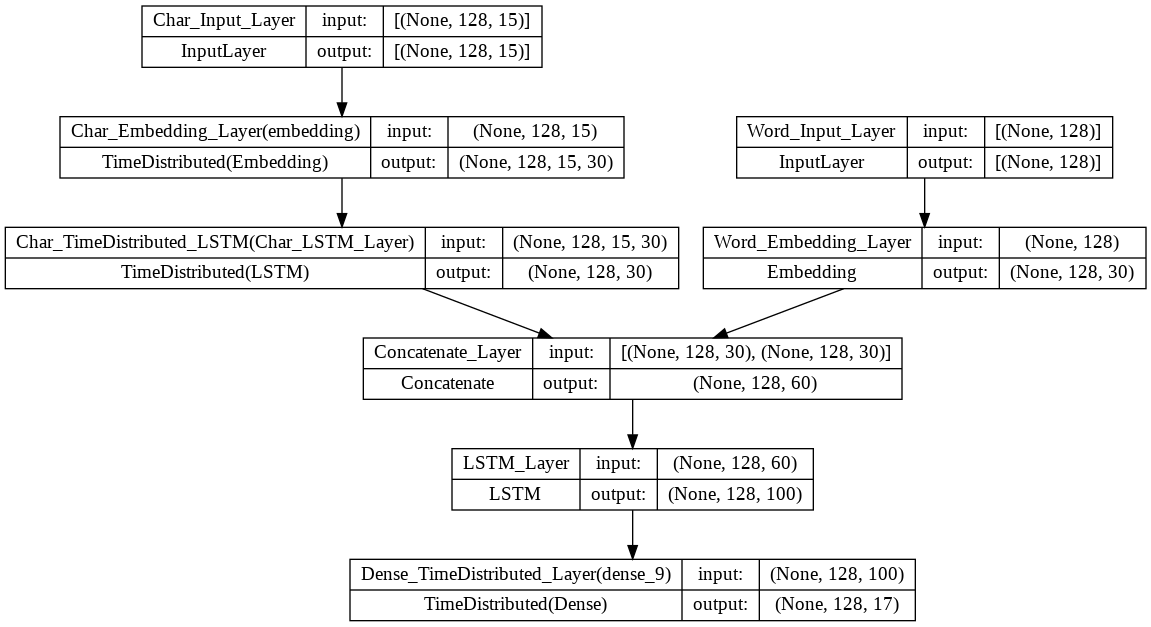

In [50]:
char_model.show()

In [51]:
# Train
char_model.train(train_inputs, train_char_inputs, train_targets, val_inputs, val_char_inputs, val_targets,loss='categorical_crossentropy', opt='adam', metrics=['accuracy'], epochs=10)

Epoch 1/10
393/393 [==============================] - 146s 351ms/step - loss: 0.0972 - accuracy: 0.5642 - val_loss: 0.0640 - val_accuracy: 0.7916
Epoch 2/10
393/393 [==============================] - 134s 341ms/step - loss: 0.0252 - accuracy: 0.8931 - val_loss: 0.0393 - val_accuracy: 0.8751
Epoch 3/10
393/393 [==============================] - 135s 345ms/step - loss: 0.0134 - accuracy: 0.9422 - val_loss: 0.0361 - val_accuracy: 0.8833
Epoch 4/10
393/393 [==============================] - 133s 338ms/step - loss: 0.0100 - accuracy: 0.9539 - val_loss: 0.0358 - val_accuracy: 0.8833
Epoch 5/10
393/393 [==============================] - 133s 339ms/step - loss: 0.0082 - accuracy: 0.9604 - val_loss: 0.0375 - val_accuracy: 0.8823
Epoch 6/10
393/393 [==============================] - 132s 336ms/step - loss: 0.0070 - accuracy: 0.9653 - val_loss: 0.0394 - val_accuracy: 0.8786
Epoch 7/10
393/393 [==============================] - 132s 337ms/step - loss: 0.0061 - accuracy: 0.9695 - val_loss: 0.0397 -

In [52]:
# Evaluate 
char_model.evaluate(test_inputs, test_char_inputs, test_targets, loss='categorical_crossentropy', opt='adam', metrics=['accuracy'],show=True)

65/65 [==============================] - 5s 10ms/step - loss: 0.0422 - accuracy: 0.8824
Test loss: 0.04215995967388153
Test accuracy: 0.8824021816253662


[0.04215995967388153, 0.8824021816253662]

In [53]:
# Predict
outputs_char=char_model.predict(test_inputs, test_char_inputs)
predictions_char=testdata.decode(outputs_char,encoder)

print(testdata.create_targets()[0])
print(predictions_char[0])

65/65 [==============================] - 3s 9ms/step
['PRON', 'SCONJ', 'PROPN', 'VERB', 'ADP', 'PROPN', 'PUNCT']
['PRON' 'SCONJ' 'PROPN' 'X' 'ADP' 'PROPN' 'PUNCT']


### CHARACTER-LEVEL MODEL (word_emb_dim=20, char_emb_dim=20, lstm_neurons=15)

In [54]:
# Character-level model (word_emb_dim=20, char_emb_dim=20, lstm_neurons=15)
char_model2=charTagger(tokenizer_word, tokenizer_char,20,20,15, out_dim=out_dim)
char_model2.build().summary()

Model: "model_42"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Char_Input_Layer (InputLayer)  [(None, 128, 15)]    0           []                               
                                                                                                  
 Word_Input_Layer (InputLayer)  [(None, 128)]        0           []                               
                                                                                                  
 Char_Embedding_Layer (TimeDist  (None, 128, 15, 20)  2200       ['Char_Input_Layer[0][0]']       
 ributed)                                                                                         
                                                                                                  
 Word_Embedding_Layer (Embeddin  (None, 128, 20)     393500      ['Word_Input_Layer[0][0]']

In [55]:
# Train
char_model2.train(train_inputs, train_char_inputs, train_targets, val_inputs, val_char_inputs, val_targets,loss='categorical_crossentropy', opt='adam', metrics=['accuracy'], epochs=10)

Epoch 1/10
393/393 [==============================] - 139s 337ms/step - loss: 0.1426 - accuracy: 0.3676 - val_loss: 0.1414 - val_accuracy: 0.5849
Epoch 2/10
393/393 [==============================] - 131s 334ms/step - loss: 0.0683 - accuracy: 0.7325 - val_loss: 0.0744 - val_accuracy: 0.8020
Epoch 3/10
393/393 [==============================] - 129s 329ms/step - loss: 0.0345 - accuracy: 0.8796 - val_loss: 0.0512 - val_accuracy: 0.8606
Epoch 4/10
393/393 [==============================] - 137s 348ms/step - loss: 0.0218 - accuracy: 0.9205 - val_loss: 0.0437 - val_accuracy: 0.8734
Epoch 5/10
393/393 [==============================] - 135s 344ms/step - loss: 0.0165 - accuracy: 0.9365 - val_loss: 0.0400 - val_accuracy: 0.8792
Epoch 6/10
393/393 [==============================] - 130s 331ms/step - loss: 0.0135 - accuracy: 0.9451 - val_loss: 0.0382 - val_accuracy: 0.8839
Epoch 7/10
393/393 [==============================] - 135s 343ms/step - loss: 0.0115 - accuracy: 0.9514 - val_loss: 0.0377 -

In [56]:
#Evaluate
char_model2.evaluate(test_inputs, test_char_inputs, test_targets, loss='categorical_crossentropy', opt='adam', metrics=['accuracy'],show=True)

65/65 [==============================] - 6s 9ms/step - loss: 0.0359 - accuracy: 0.8876
Test loss: 0.03594023361802101
Test accuracy: 0.8875826597213745


[0.03594023361802101, 0.8875826597213745]

In [57]:
#Predict
outputs_char2=char_model2.predict(test_inputs, test_char_inputs)
predictions_char2=testdata.decode(outputs_char2,encoder)

65/65 [==============================] - 3s 8ms/step


In [58]:
print(testdata.create_targets()[0])
print(predictions_char2[0])

['PRON', 'SCONJ', 'PROPN', 'VERB', 'ADP', 'PROPN', 'PUNCT']
['PRON' 'SCONJ' 'PROPN' 'PROPN' 'ADP' 'PROPN' 'PUNCT']


### CHARACTER-LEVEL MODEL (word_emb_dim=100, char_emb_dim=50, lstm_neurons=15)

In [59]:
# Character-level model (word_emb_dim=100, char_emb_dim=50, lstm_neurons=15)
char_model3=charTagger(tokenizer_word, tokenizer_char,100,50,15, out_dim=out_dim)
char_model3.build().summary()

Model: "model_46"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Char_Input_Layer (InputLayer)  [(None, 128, 15)]    0           []                               
                                                                                                  
 Word_Input_Layer (InputLayer)  [(None, 128)]        0           []                               
                                                                                                  
 Char_Embedding_Layer (TimeDist  (None, 128, 15, 50)  5500       ['Char_Input_Layer[0][0]']       
 ributed)                                                                                         
                                                                                                  
 Word_Embedding_Layer (Embeddin  (None, 128, 100)    1967500     ['Word_Input_Layer[0][0]']

In [60]:
# Train
char_model3.train(train_inputs, train_char_inputs, train_targets, val_inputs, val_char_inputs, val_targets,loss='categorical_crossentropy', opt='adam', metrics=['accuracy'], epochs=10)

Epoch 1/10
393/393 [==============================] - 142s 343ms/step - loss: 0.1105 - accuracy: 0.5572 - val_loss: 0.0827 - val_accuracy: 0.7983
Epoch 2/10
393/393 [==============================] - 132s 336ms/step - loss: 0.0349 - accuracy: 0.8942 - val_loss: 0.0477 - val_accuracy: 0.8688
Epoch 3/10
393/393 [==============================] - 132s 335ms/step - loss: 0.0187 - accuracy: 0.9324 - val_loss: 0.0417 - val_accuracy: 0.8726
Epoch 4/10
393/393 [==============================] - 131s 333ms/step - loss: 0.0141 - accuracy: 0.9455 - val_loss: 0.0401 - val_accuracy: 0.8705
Epoch 5/10
393/393 [==============================] - 132s 335ms/step - loss: 0.0119 - accuracy: 0.9504 - val_loss: 0.0388 - val_accuracy: 0.8776
Epoch 6/10
393/393 [==============================] - 131s 334ms/step - loss: 0.0105 - accuracy: 0.9540 - val_loss: 0.0384 - val_accuracy: 0.8800
Epoch 7/10
393/393 [==============================] - 131s 333ms/step - loss: 0.0095 - accuracy: 0.9571 - val_loss: 0.0408 -

In [61]:
#Evaluate
char_model3.evaluate(test_inputs, test_char_inputs, test_targets, loss='categorical_crossentropy', opt='adam', metrics=['accuracy'],show=True)

65/65 [==============================] - 5s 12ms/step - loss: 0.0386 - accuracy: 0.8794
Test loss: 0.03862079977989197
Test accuracy: 0.8793735504150391


[0.03862079977989197, 0.8793735504150391]

In [62]:
#Predict
outputs_char3=char_model3.predict(test_inputs, test_char_inputs)
predictions_char3=testdata.decode(outputs_char3,encoder)

65/65 [==============================] - 3s 10ms/step


In [63]:
print(testdata.create_targets()[16])
print(predictions_char3[16])

['VERB', 'DET', 'NOUN', 'ADP', 'DET', 'PROPN', 'NOUN', 'PUNCT']
['NOUN' 'DET' 'NOUN' 'PART' 'DET' 'PROPN' 'NUM' 'PUNCT']
